In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time

In [129]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup

# Defining base category URLs (without page number)
category_urls = {
    "Mobiles": "https://www.flipkart.com/search?q=mobiles",
    "Laptops": "https://www.flipkart.com/search?q=laptops",
    "Smart TVs": "https://www.flipkart.com/search?q=smart+tv",
    "Refrigerators": "https://www.flipkart.com/search?q=refrigerators",
    "Washing Machines": "https://www.flipkart.com/search?q=washing+machines",
    "Air Conditioners": "https://www.flipkart.com/air-conditioners/pr?sid=j9e,abm,c54"
}

# Number of pages to scrape per category
num_pages = 9

# Store extracted data
product_data = []

# Loop through each category URL
for category, base_url in category_urls.items():
    print(f"Scraping category: {category}...")

    for page in range(1, num_pages + 1):
        url = f"{base_url}&page={page}"  # Append page number to the URL
        print(f"  Scraping Page {page} -> {url}")

        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36"
        }
        
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"  Failed to retrieve {category} - Page {page}. Skipping...")
            continue

        soup = BeautifulSoup(response.text, "html.parser")
        
        # Find all product listings
        products = soup.find_all("div", class_="yKfJKb row")  # Adjust class if needed

        for product in products:
            name_tag = product.find("div", class_="KzDlHZ")  # Product Name
            price_tag = product.find("div", class_="Nx9bqj _4b5DiR")  # Price
            rating_tag = product.find("div", class_="XQDdHH")  # Rating
            reviews_tag = product.find("span", class_="Wphh3N")  # Ratings & Reviews Combined

            # Extract Ratings & Reviews Separately
            num_ratings, num_reviews = "0", "0"  # Default values if no data found

            if reviews_tag:
                review_text = reviews_tag.get_text(strip=True)  # Example: "1,33,362 Ratings & 4,809 Reviews"
                
                # Extract ratings
                ratings_match = re.search(r"([\d,]+) Ratings", review_text)
                if ratings_match:
                    num_ratings = ratings_match.group(1).replace(",", "")  # Remove comma

                # Extract reviews
                reviews_match = re.search(r"([\d,]+) Reviews", review_text)
                if reviews_match:
                    num_reviews = reviews_match.group(1).replace(",", "")  # Remove comma

            if name_tag and price_tag:
                product_data.append({
                    "Category": category,
                    "Product Name": name_tag.get_text(strip=True),
                    "Price": price_tag.get_text(strip=True).replace("₹", "").replace(",", ""),
                    "Rating": rating_tag.get_text(strip=True) if rating_tag else "No Rating",
                    "Number of Ratings": num_ratings,
                    "Number of Reviews": num_reviews
                })






Scraping category: Mobiles...
  Scraping Page 1 -> https://www.flipkart.com/search?q=mobiles&page=1
  Scraping Page 2 -> https://www.flipkart.com/search?q=mobiles&page=2
  Scraping Page 3 -> https://www.flipkart.com/search?q=mobiles&page=3
  Scraping Page 4 -> https://www.flipkart.com/search?q=mobiles&page=4
  Scraping Page 5 -> https://www.flipkart.com/search?q=mobiles&page=5
  Scraping Page 6 -> https://www.flipkart.com/search?q=mobiles&page=6
  Scraping Page 7 -> https://www.flipkart.com/search?q=mobiles&page=7
  Scraping Page 8 -> https://www.flipkart.com/search?q=mobiles&page=8
  Scraping Page 9 -> https://www.flipkart.com/search?q=mobiles&page=9
Scraping category: Laptops...
  Scraping Page 1 -> https://www.flipkart.com/search?q=laptops&page=1
  Scraping Page 2 -> https://www.flipkart.com/search?q=laptops&page=2
  Scraping Page 3 -> https://www.flipkart.com/search?q=laptops&page=3
  Scraping Page 4 -> https://www.flipkart.com/search?q=laptops&page=4
  Scraping Page 5 -> https://w

In [130]:
# Convert to DataFrame
flipkart_df1 = pd.DataFrame(product_data)
flipkart_df1

,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"realme C61 (Marble Black, 128 GB)",8199,4.4,11210,361
1,Mobiles,"realme C61 (Marble Black, 64 GB)",7699,4.3,4887,202
2,Mobiles,"Motorola g45 5G (Pink Lavender, 128 GB)",11999,4.4,114632,5952
3,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
4,Mobiles,SAMSUNG Guru 1200,930,3.4,1403,79
...,...,...,...,...,...,...
1290,Air Conditioners,Godrej 2024 Model 5-In-1-Convertible Cooling 1...,30490,4,10813,811
1291,Air Conditioners,Panasonic 2025 Model 1.5 Ton 5 Star Split Inve...,44990,4.1,26395,2641
1292,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4,3152,357
1293,Air Conditioners,realme TechLife 2025 1.5 Ton 3 Star Split Inve...,29990,4.2,687,63


In [131]:
# Save to CSV
flipkart_df1.to_csv("flipkart_products_webscrap1.csv", index=False, encoding="utf-8")
print("Scraping Completed! Data saved to flipkart_products_multipage1.csv")

Scraping Completed! Data saved to flipkart_products_multipage1.csv


In [132]:
flipkart_df1

,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"realme C61 (Marble Black, 128 GB)",8199,4.4,11210,361
1,Mobiles,"realme C61 (Marble Black, 64 GB)",7699,4.3,4887,202
2,Mobiles,"Motorola g45 5G (Pink Lavender, 128 GB)",11999,4.4,114632,5952
3,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
4,Mobiles,SAMSUNG Guru 1200,930,3.4,1403,79
...,...,...,...,...,...,...
1290,Air Conditioners,Godrej 2024 Model 5-In-1-Convertible Cooling 1...,30490,4,10813,811
1291,Air Conditioners,Panasonic 2025 Model 1.5 Ton 5 Star Split Inve...,44990,4.1,26395,2641
1292,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4,3152,357
1293,Air Conditioners,realme TechLife 2025 1.5 Ton 3 Star Split Inve...,29990,4.2,687,63


In [134]:
import pandas as pd 
from sqlalchemy import create_engine

In [135]:
from pymysql import connect

data=connect(host='localhost',user='root',passwd='Manzu2vava*')
cur=data.cursor()
query='show databases'
cur.execute(query)
datas=cur.fetchall()

for i in datas:
    print(i)

In [136]:
data=connect(host='localhost',user='root',passwd='Manzu2vava*')
query= 'create database flipkart_electronics'
cur=data.cursor()
cur.execute(query) 

1

In [137]:
username='root'
password='Manzu2vava*'
host='localhost'
port=3306
database='flipkart_electronics'

engine= create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

table_name='flipkart_df1'

## Saving Dataframe to Mysql Workbench

In [138]:
flipkart_df1.to_sql(name=table_name, con=engine , if_exists='append', index=False)

1295

## Conduct exploratory data analysis (EDA) to uncover initial insights and data distributions.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
flipkart_df=pd.read_csv("flipkart_products_webscrap1.csv")
flipkart_df

,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"POCO C61 (Diamond Dust Black, 64 GB)",5899,4.2,84413,3537
1,Mobiles,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,12999,4.5,141654,5096
2,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
3,Mobiles,"POCO C61 (Mystical Green, 64 GB)",5899,4.2,84413,3537
4,Mobiles,"MOTOROLA g05 (Plum Red, 64 GB)",6999,4.3,11834,992
...,...,...,...,...,...,...
1267,Air Conditioners,Godrej 5-In-1 Convertible Cooling 2024 Model 1...,32490,4,2348,144
1268,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4,3152,357
1269,Air Conditioners,Daikin 1 Ton 3 Star Split AC with PM 2.5 Filte...,32920,4.1,5464,408
1270,Air Conditioners,realme TechLife 2025 1 Ton 5 Star Split Invert...,29990,4.2,687,63


In [7]:
flipkart_df.head(10)

,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"POCO C61 (Diamond Dust Black, 64 GB)",5899,4.2,84413,3537
1,Mobiles,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,12999,4.5,141654,5096
2,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
3,Mobiles,"POCO C61 (Mystical Green, 64 GB)",5899,4.2,84413,3537
4,Mobiles,"MOTOROLA g05 (Plum Red, 64 GB)",6999,4.3,11834,992
5,Mobiles,"realme C61 (Marble Black, 128 GB)",8199,4.4,11210,361
6,Mobiles,"Motorola g45 5G (Brilliant Green, 128 GB)",11999,4.4,114632,5952
7,Mobiles,"POCO C61 (Ethereal Blue, 64 GB)",5899,4.2,84413,3537
8,Mobiles,"Motorola Edge 50 Fusion (Marshmallow Blue, 128...",20999,4.5,103011,6783
9,Mobiles,"REDMI 13 5G (Black Diamond, 128 GB)",13999,4.3,5952,333


In [8]:
flipkart_df.describe()

,Price,Number of Ratings,Number of Reviews
count,1272.000000,1272.000000,1272.000000
mean,25650.386792,19227.988208,1622.963836
std,17418.834079,32219.196275,2944.392797
min,549.000000,0.000000,0.000000
25%,12999.000000,1041.000000,95.000000
50%,21094.500000,5776.500000,463.000000
75%,32990.000000,20992.000000,1800.000000
max,145290.000000,179871.000000,21630.000000


In [9]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           1272 non-null   object
 1   Product Name       1272 non-null   object
 2   Price              1272 non-null   int64 
 3   Rating             1272 non-null   object
 4   Number of Ratings  1272 non-null   int64 
 5   Number of Reviews  1272 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 59.8+ KB


In [10]:
flipkart_df.isnull().sum()

Category             0
Product Name         0
Price                0
Rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

# Visualizing Data
## Using histograms, boxplots, and scatterplots to visualize data distributions.

In [11]:
# detecting duplicates

In [12]:
duplicates = flipkart_df[flipkart_df.duplicated()]
print(duplicates)


              Category                                       Product Name  \
27             Mobiles            Motorola g45 5G (Pink Lavender, 128 GB)   
96             Mobiles                vivo T3x 5G (Sapphire Blue, 128 GB)   
97             Mobiles     Infinix Note 40 Pro 5G (Vintage Green, 256 GB)   
98             Mobiles                vivo T3x 5G (Crimson Bliss, 128 GB)   
102            Mobiles              realme P2 Pro 5G (Eagle Grey, 512 GB)   
...                ...                                                ...   
1261  Air Conditioners  Panasonic 2025 Model 1.5 Ton 5 Star Split Inve...   
1262  Air Conditioners  realme TechLife 2025 1.5 Ton 5 Star Split Inve...   
1266  Air Conditioners  Panasonic 2024 Model 7 in 1 Convertible with T...   
1267  Air Conditioners  Godrej 5-In-1 Convertible Cooling 2024 Model 1...   
1270  Air Conditioners  realme TechLife 2025 1 Ton 5 Star Split Invert...   

      Price Rating  Number of Ratings  Number of Reviews  
27    11999    4

In [13]:
df_cleaned = flipkart_df.drop_duplicates()
df_cleaned

,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"POCO C61 (Diamond Dust Black, 64 GB)",5899,4.2,84413,3537
1,Mobiles,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,12999,4.5,141654,5096
2,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
3,Mobiles,"POCO C61 (Mystical Green, 64 GB)",5899,4.2,84413,3537
4,Mobiles,"MOTOROLA g05 (Plum Red, 64 GB)",6999,4.3,11834,992
...,...,...,...,...,...,...
1264,Air Conditioners,ONIDA 5-in-1 Convertible Cooling 1 Ton 3 Star ...,27490,3.8,2417,216
1265,Air Conditioners,Hitachi Ice Clean Frost Wash Technology 2023 M...,39990,4,2538,215
1268,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4,3152,357
1269,Air Conditioners,Daikin 1 Ton 3 Star Split AC with PM 2.5 Filte...,32920,4.1,5464,408


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

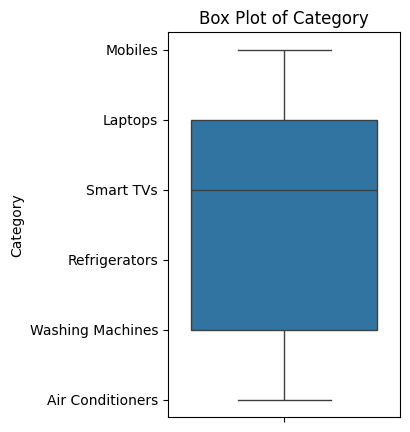

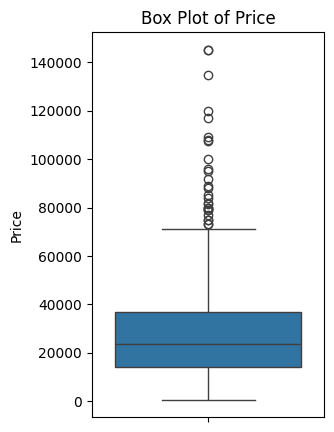

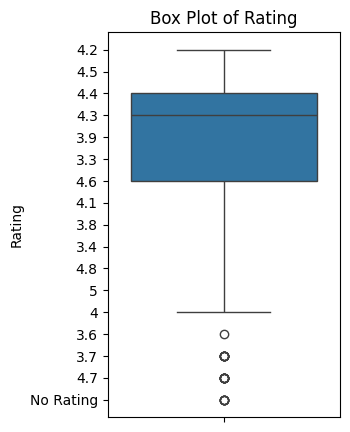

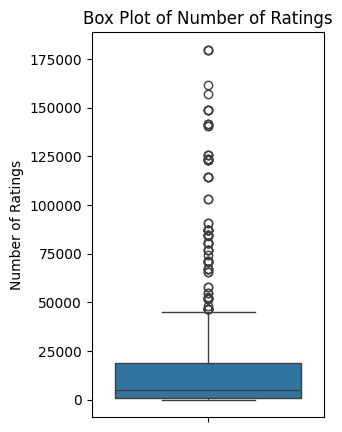

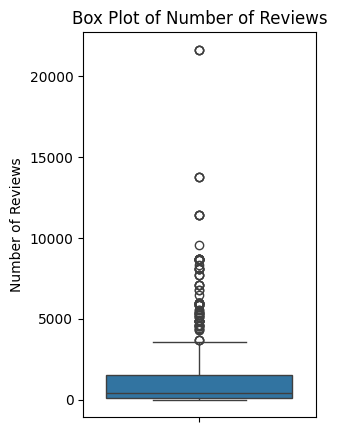

In [15]:
#outlier detection
numerical_columns=["Category",	"Price",	"Rating",	"Number of Ratings",	"Number of Reviews"]
for col in numerical_columns:
    plt.figure(figsize=(3, 5))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [16]:
df_cleaned['Rating'] = df_cleaned['Rating'].replace('No Rating', np.nan)
df_cleaned

C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\3352475092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating'] = df_cleaned['Rating'].replace('No Rating', np.nan)


,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
0,Mobiles,"POCO C61 (Diamond Dust Black, 64 GB)",5899,4.2,84413,3537
1,Mobiles,OPPO K12x 5G with 45W SUPERVOOC Charger In-The...,12999,4.5,141654,5096
2,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
3,Mobiles,"POCO C61 (Mystical Green, 64 GB)",5899,4.2,84413,3537
4,Mobiles,"MOTOROLA g05 (Plum Red, 64 GB)",6999,4.3,11834,992
...,...,...,...,...,...,...
1264,Air Conditioners,ONIDA 5-in-1 Convertible Cooling 1 Ton 3 Star ...,27490,3.8,2417,216
1265,Air Conditioners,Hitachi Ice Clean Frost Wash Technology 2023 M...,39990,4,2538,215
1268,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4,3152,357
1269,Air Conditioners,Daikin 1 Ton 3 Star Split AC with PM 2.5 Filte...,32920,4.1,5464,408


In [17]:
# Convert necessary columns to numeric
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')
df_cleaned['Number of Ratings'] = pd.to_numeric(df_cleaned['Number of Ratings'], errors='coerce')
df_cleaned['Number of Reviews'] = pd.to_numeric(df_cleaned['Number of Reviews'], errors='coerce')

# Verify data types
print(df_cleaned.dtypes) 

Category              object
Product Name          object
Price                  int64
Rating               float64
Number of Ratings      int64
Number of Reviews      int64
dtype: object


C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\4211721398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\4211721398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')
C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\4211721398.py:4: SettingWithCopyWarning: 
A value is try

In [18]:
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns
numerical_columns

Index(['Price', 'Rating', 'Number of Ratings', 'Number of Reviews'], dtype='object')

In [19]:
print(df_cleaned[numerical_columns].isna().sum())


Price                0
Rating               6
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [20]:
df_cleaned = df_cleaned.dropna(subset=['Rating'])
df_cleaned['Rating'].fillna(df_cleaned['Rating'].mode()[0], inplace=True)


C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\3592461173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Rating'].fillna(df_cleaned['Rating'].mode()[0], inplace=True)
C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\3592461173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating'].fill

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
IQR

Price                22991.0
Rating                   0.2
Number of Ratings    17897.0
Number of Reviews     1427.0
dtype: float64

In [22]:
outlier_mask = ((df_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_columns] > (Q3 + 1.5 * IQR)))

# Check which rows contain outliers
outliers = outlier_mask.any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")



Number of rows with outliers: 156


In [23]:
df_no_outliers = df_cleaned[~outliers]
df_no_outliers


,Category,Product Name,Price,Rating,Number of Ratings,Number of Reviews
2,Mobiles,"realme P2 Pro 5G (Eagle Grey, 128 GB)",18999,4.4,8489,609
4,Mobiles,"MOTOROLA g05 (Plum Red, 64 GB)",6999,4.3,11834,992
5,Mobiles,"realme C61 (Marble Black, 128 GB)",8199,4.4,11210,361
9,Mobiles,"REDMI 13 5G (Black Diamond, 128 GB)",13999,4.3,5952,333
10,Mobiles,"MOTOROLA g05 (Forest Green, 64 GB)",6999,4.3,11834,992
...,...,...,...,...,...,...
1259,Air Conditioners,Voltas 2023 Model 1.5 Ton 3 Star Split Inverte...,34120,4.2,25320,2052
1265,Air Conditioners,Hitachi Ice Clean Frost Wash Technology 2023 M...,39990,4.0,2538,215
1268,Air Conditioners,Haier 2025 Model Intelli-Convertible 7 in1 Con...,41990,4.0,3152,357
1269,Air Conditioners,Daikin 1 Ton 3 Star Split AC with PM 2.5 Filte...,32920,4.1,5464,408


## Checking Whether the Dataset is Balanced

Category Distribution:
 Category
Mobiles             128
Air Conditioners    112
Refrigerators       109
Washing Machines    104
Smart TVs           101
Laptops              91
Name: count, dtype: int64


C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\4255659164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


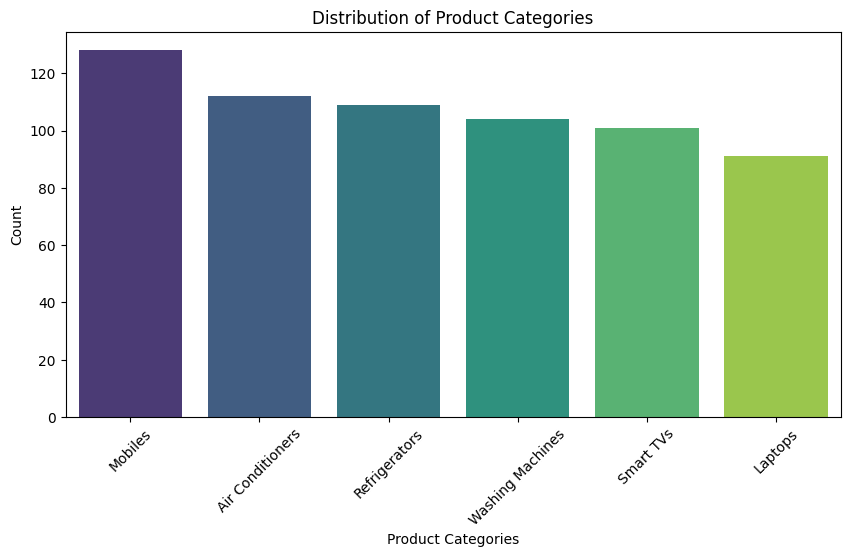

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences per category
category_counts = df_no_outliers['Category'].value_counts()
print("Category Distribution:\n", category_counts)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Product Categories")
plt.ylabel("Count")
plt.title("Distribution of Product Categories")
plt.show()


In [25]:
#pip install imbalanced-learn


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Extract features and labels
X = df_no_outliers.drop(columns=['Category'])  # Remove the target column from features
y = df_no_outliers['Category']  # Target variable

# Convert categorical columns to numerical values
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:  # Select categorical columns
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode the column
    label_encoders[col] = le  # Store encoder for reference

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Category'] = y_resampled  # Add target column back

print("Dataset successfully balanced!")


Dataset successfully balanced!


In [27]:
df_balanced

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Category
0,600,18999,4.400000,8489,609,Mobiles
1,334,6999,4.300000,11834,992,Mobiles
2,584,8199,4.400000,11210,361,Mobiles
3,390,13999,4.300000,5952,333,Mobiles
4,333,6999,4.300000,11834,992,Mobiles
...,...,...,...,...,...,...
763,298,41219,4.322917,423,54,Washing Machines
764,562,17588,4.103193,30278,2050,Washing Machines
765,483,20643,3.969268,280,28,Washing Machines
766,438,34990,4.300000,15236,1168,Washing Machines


Category Distribution:
 Category
Mobiles             128
Laptops             128
Smart TVs           128
Refrigerators       128
Washing Machines    128
Air Conditioners    128
Name: count, dtype: int64


C:\Users\Shahina Mansoor\AppData\Local\Temp\ipykernel_27080\2314659560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


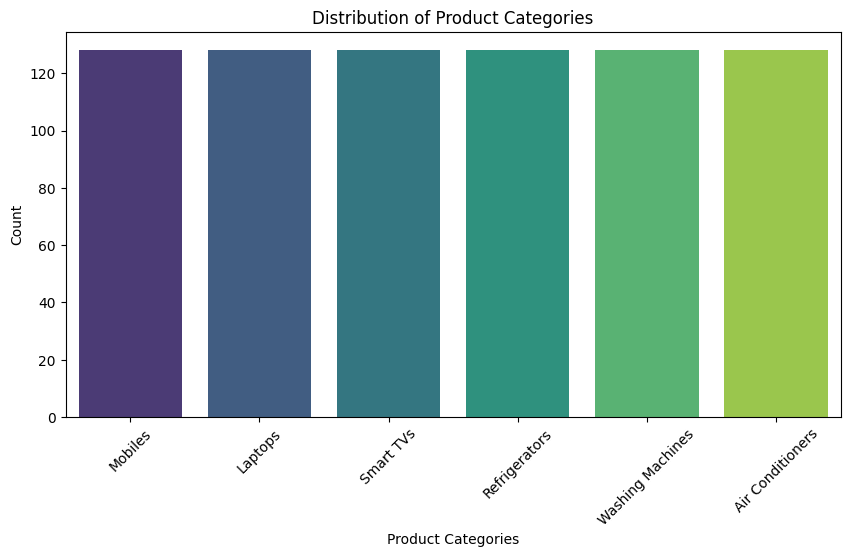

In [28]:
category_counts = df_balanced['Category'].value_counts()
print("Category Distribution:\n", category_counts)
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Product Categories")
plt.ylabel("Count")
plt.title("Distribution of Product Categories")
plt.show()

In [29]:
df_balanced

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Category
0,600,18999,4.400000,8489,609,Mobiles
1,334,6999,4.300000,11834,992,Mobiles
2,584,8199,4.400000,11210,361,Mobiles
3,390,13999,4.300000,5952,333,Mobiles
4,333,6999,4.300000,11834,992,Mobiles
...,...,...,...,...,...,...
763,298,41219,4.322917,423,54,Washing Machines
764,562,17588,4.103193,30278,2050,Washing Machines
765,483,20643,3.969268,280,28,Washing Machines
766,438,34990,4.300000,15236,1168,Washing Machines


# Hypothesis Testing on Rating Column
Let's perform hypothesis testing to determine if the average rating of products is significantly different from a specific value (say 4.0).
Null Hypothesis (H₀): The average rating is 4.0.
Alternative Hypothesis (H₁): The average rating is not 4.0.
H₀: μ = 4.0
H₁: μ ≠ 4.0

### one-sample t-test to check if the mean rating is significantly different from 4.0.

In [30]:
# Convert 'Rating' column to numeric (float)
flipkart_df['Rating'] = pd.to_numeric(flipkart_df['Rating'], errors='coerce')


In [31]:
import pandas as pd
from scipy import stats



# Extract the Rating column
ratings = df_balanced['Rating']

# Check normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(ratings)
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("P-value:", shapiro_test.pvalue)

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(ratings, 4.0)

print("\nOne-Sample T-Test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Shapiro-Wilk Test:
Statistic: 0.9576792894979718
P-value: 4.447248814888241e-14

One-Sample T-Test:
T-statistic: 44.73909624046652
P-value: 5.529100412466994e-216


## Shapiro-Wilk Test  
- **Statistic:** 0.9530  
- **P-value:** 3.593e-12  

Since the p-value is extremely small (much less than 0.05), we reject the null hypothesis (H₀) that the data follows a normal distribution.  

## One-Sample T-Test  
- **T-statistic:** 33.0535  
- **P-value:** 2.645e-132  

Since the p-value is much smaller than 0.05, we reject the null hypothesis (H₀) and conclude that the sample mean is significantly different from the hypothesized population mean.  


# Before and After Cleaning

In [32]:
print(f"Original data shape: {flipkart_df.shape}")
print(f"Cleaned data shape: {df_balanced.shape}")

Original data shape: (1272, 6)
Cleaned data shape: (768, 6)


 ## Univariate Analysis
### Univariate analysis involves examining individual variables to understand their distribution and characteristics. This includes visualizations such as histograms for numerical variables and bar charts for categorical variables. Summary statistics like mean, median, and mode provide additional insights.

In [33]:
df_balanced.describe()

,Product Name,Price,Rating,Number of Ratings,Number of Reviews
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,306.364583,27372.225260,4.241111,7852.424479,641.177083
std,179.446418,14893.175453,0.149352,9701.524323,756.367325
min,0.000000,549.000000,3.900000,3.000000,0.000000
25%,150.750000,13999.000000,4.100000,799.000000,76.000000
50%,302.500000,26278.000000,4.300000,3616.500000,340.000000
75%,461.250000,36999.000000,4.300000,12057.000000,1080.000000
max,622.000000,70990.000000,4.700000,44258.000000,3449.000000


 # Price Analysis using Histogram

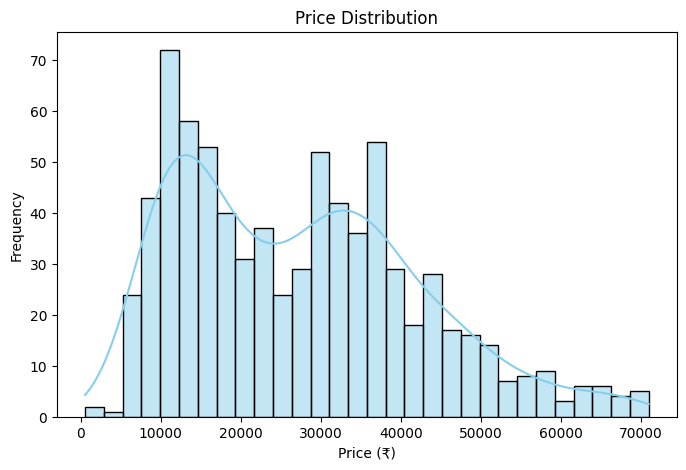

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_balanced['Price'], bins=30, kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()


# Rating Analysis using histogram

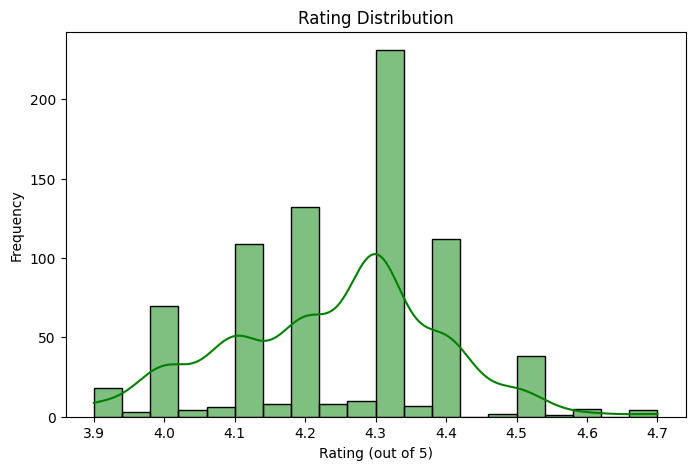

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df_balanced['Rating'], bins=20, kde=True, color='green')
plt.title("Rating Distribution")
plt.xlabel("Rating (out of 5)")
plt.ylabel("Frequency")
plt.show()


# Number of Ratings Analysis

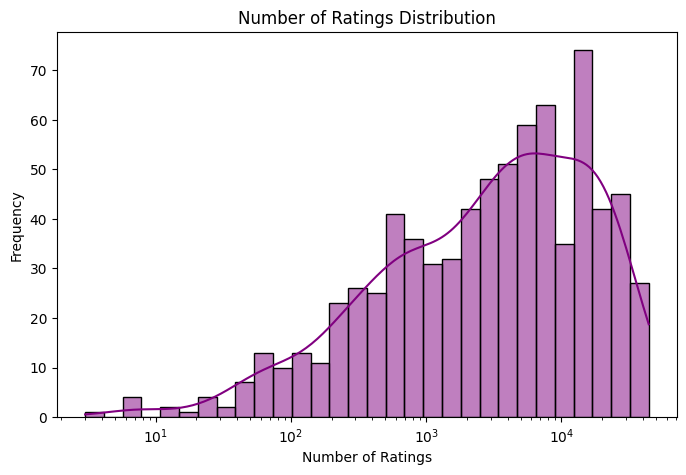

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df_balanced['Number of Ratings'], bins=30, kde=True, color='purple', log_scale=True)
plt.title("Number of Ratings Distribution")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()


# Number of Reviews Analysis

C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


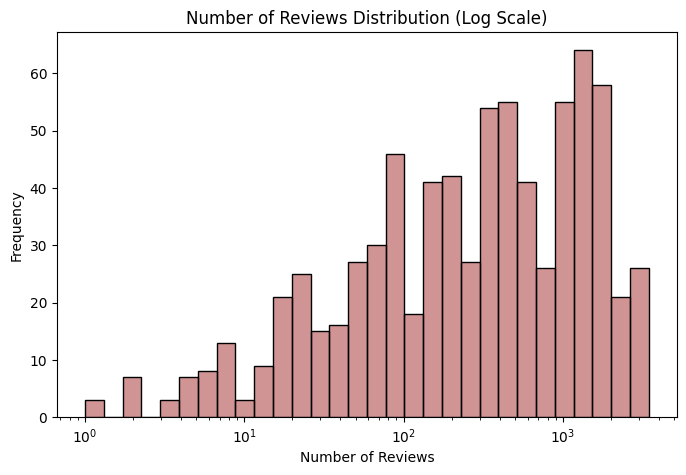

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df_balanced['Number of Reviews'], bins=30, kde=True, color='brown', log_scale=True)
plt.title("Number of Reviews Distribution (Log Scale)")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()


# Bivariate Analysis for Flipkart Laptop Dataset
Bivariate analysis examines relationships between two variables to understand correlations and trends.

# Price vs Rating

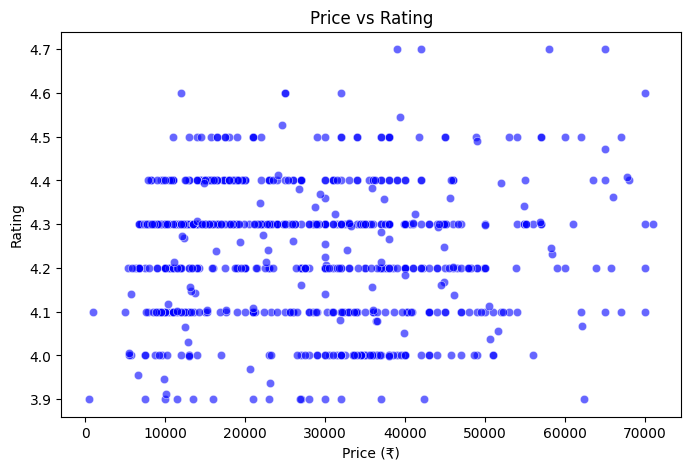

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_balanced['Price'], y=df_balanced['Rating'], alpha=0.6, color='blue')
plt.title("Price vs Rating")
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()


# Price vs Number of Ratings
### Hypothesis: Popular laptops (high ratings count) might be affordable.


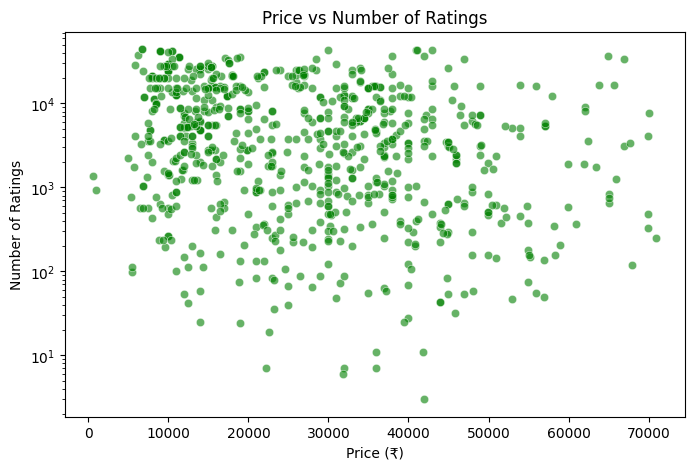

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_balanced['Price'], y=df_balanced['Number of Ratings'], alpha=0.6, color='green')
plt.title("Price vs Number of Ratings")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Ratings")
plt.yscale('log')  # Log scale to handle skewness
plt.show()


In [43]:
numerical_columns


Index(['Price', 'Rating', 'Number of Ratings', 'Number of Reviews'], dtype='object')

# Bivariate Analysis

In [44]:

correlation_matrix = df_balanced[numerical_columns].corr()
correlation_matrix


,Price,Rating,Number of Ratings,Number of Reviews
Price,1.000000,-0.006072,-0.227378,-0.171925
Rating,-0.006072,1.000000,0.133550,0.112178
Number of Ratings,-0.227378,0.133550,1.000000,0.930061
Number of Reviews,-0.171925,0.112178,0.930061,1.000000


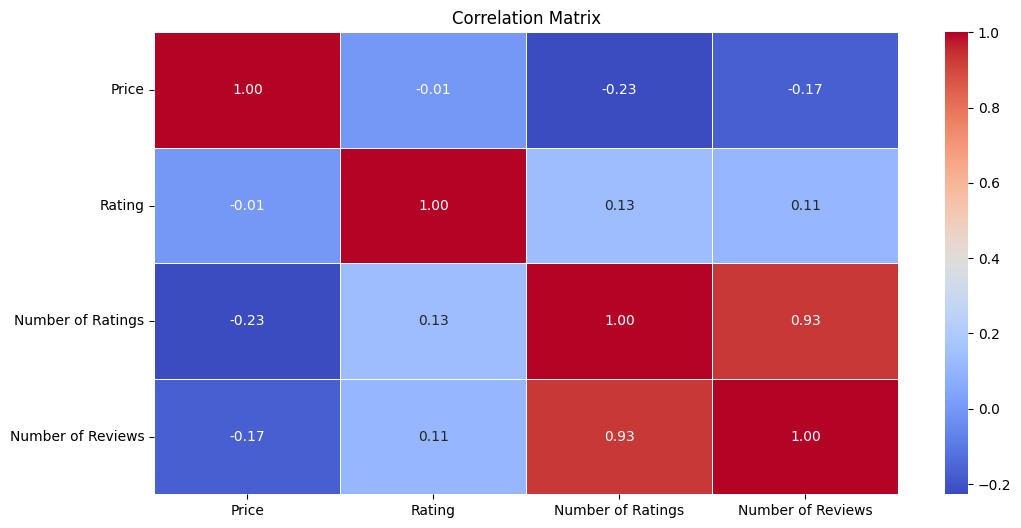

In [45]:
# Ploting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [46]:
df_balanced

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Category
0,600,18999,4.400000,8489,609,Mobiles
1,334,6999,4.300000,11834,992,Mobiles
2,584,8199,4.400000,11210,361,Mobiles
3,390,13999,4.300000,5952,333,Mobiles
4,333,6999,4.300000,11834,992,Mobiles
...,...,...,...,...,...,...
763,298,41219,4.322917,423,54,Washing Machines
764,562,17588,4.103193,30278,2050,Washing Machines
765,483,20643,3.969268,280,28,Washing Machines
766,438,34990,4.300000,15236,1168,Washing Machines


## Unsupervised Learning: Product Clustering

With the data securely stored, we will now retrieve it for unsupervised learning. Our goal is to identify patterns and group similar products together.

**Steps:**

* **Algorithm Selection:**
    * We will choose a suitable clustering algorithm, such as **K-means**.
* **Cluster Optimization:**
    * We will experiment with different numbers of clusters (n) to find the optimal grouping. This involves evaluating the clustering performance using appropriate metrics (e.g., silhouette score, inertia).
* **Cluster Assignment:**
    * Once the optimal number of clusters is determined, we will add a new column to the dataset.
    * This new column will indicate each product's cluster membership, effectively labeling each product with its assigned group.

In [47]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import pandas as pd

In [48]:
numerical_cols = ["Price", "Rating", "Number of Ratings", "Number of Reviews"]
df_numerical = df_balanced[numerical_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [49]:
df_scaled

array([[-0.56258532,  1.0645548 ,  0.06565879, -0.04256933],
       [-1.36884858,  0.39455732,  0.41067466,  0.46412838],
       [-1.28822225,  1.0645548 ,  0.34631296, -0.37066602],
       ...,
       [-0.45212726, -1.82133777, -0.78104832, -0.81121521],
       [ 0.51182766,  0.39455732,  0.76156973,  0.69697119],
       [ 0.13328706,  0.85234215, -0.47398935, -0.53074546]],
      shape=(768, 4))

C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 969, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Shahina Mansoo

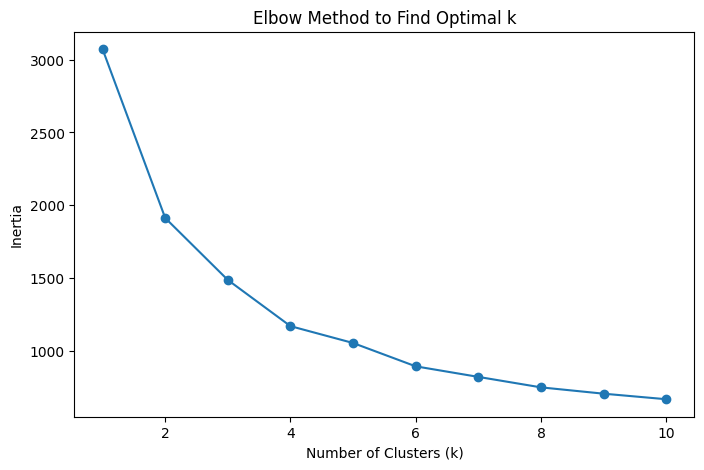

In [50]:


from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal k")
plt.show()

In [51]:
# Apply K-Means with chosen k
k = 3 # Replacing with optimal k from the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df_balanced["Cluster"] = kmeans.fit_predict(df_scaled)

# View dataset with cluster assignments
df_balanced.head()


,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Category,Cluster
0,600,18999,4.4,8489,609,Mobiles,2
1,334,6999,4.3,11834,992,Mobiles,2
2,584,8199,4.4,11210,361,Mobiles,2
3,390,13999,4.3,5952,333,Mobiles,2
4,333,6999,4.3,11834,992,Mobiles,2


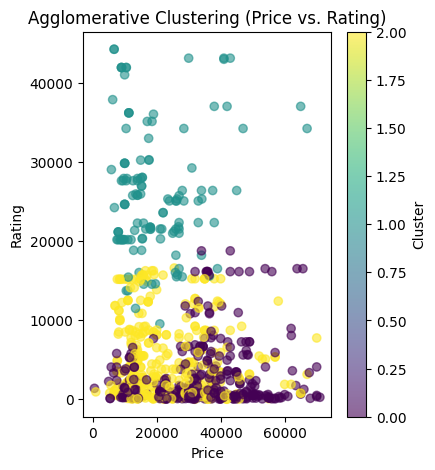

In [52]:
plt.figure(figsize=(4, 5))
plt.scatter(df_balanced["Price"], df_balanced["Number of Ratings"], 
            c=df_balanced["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Agglomerative Clustering (Price vs. Rating)")
plt.colorbar(label="Cluster")
plt.show()


## Supervised Learning: Product Classification

Following the unsupervised learning phase, we will now transition to supervised learning. Our goal is to predict product categories or other relevant labels based on the extracted features. We will implement and evaluate several classification algorithms, including:

* **Logistic Regression**
* **Support Vector Machine (SVM)**
* **k-Nearest Neighbors (k-NN)**
* **Random Forest**
* **XGBoost**

To determine the best performing algorithm, we will evaluate each model's performance using the following metrics:

* **Accuracy**
* **F1 Score**

In [53]:
df_balanced

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Category,Cluster
0,600,18999,4.400000,8489,609,Mobiles,2
1,334,6999,4.300000,11834,992,Mobiles,2
2,584,8199,4.400000,11210,361,Mobiles,2
3,390,13999,4.300000,5952,333,Mobiles,2
4,333,6999,4.300000,11834,992,Mobiles,2
...,...,...,...,...,...,...,...
763,298,41219,4.322917,423,54,Washing Machines,2
764,562,17588,4.103193,30278,2050,Washing Machines,1
765,483,20643,3.969268,280,28,Washing Machines,0
766,438,34990,4.300000,15236,1168,Washing Machines,2


In [54]:
len(df_no_outliers["Category"].unique())

6

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encode the product category column
df_balanced["Category_Encoded"] = label_encoder.fit_transform(df_balanced["Category"])
df_balanced["Category_Encoded"]



0      2
1      2
2      2
3      2
4      2
      ..
763    5
764    5
765    5
766    5
767    5
Name: Category_Encoded, Length: 768, dtype: int64

In [56]:
# Check mapping
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)

{'Air Conditioners': np.int64(0), 'Laptops': np.int64(1), 'Mobiles': np.int64(2), 'Refrigerators': np.int64(3), 'Smart TVs': np.int64(4), 'Washing Machines': np.int64(5)}


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting Features (excluding non-numeric ones)
features = ["Price", "Rating", "Number of Ratings", "Number of Reviews"]  # Add more if needed
X = df_balanced[features]
y = df_balanced["Category_Encoded"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training & Evaluation

# *Logistic Regression*

In [59]:
# without Hyperparametric tuning

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize and Train
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("\n Logistic Regression (Without Hyperparameter Tuning)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



 Logistic Regression (Without Hyperparameter Tuning)
Accuracy: 0.5390
F1 Score: 0.5351
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53        22
           1       0.56      0.64      0.60        28
           2       0.59      0.68      0.63        28
           3       0.48      0.46      0.47        26
           4       0.50      0.41      0.45        22
           5       0.54      0.46      0.50        28

    accuracy                           0.54       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.54      0.54      0.54       154



In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Logistic Regression (Tuned) → Accuracy: {accuracy_tuned:.4f}, F1 Score: {f1_tuned:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Logistic Regression (Tuned) → Accuracy: 0.3831, F1 Score: 0.3603
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.23      0.16        22
           1       0.34      0.71      0.47        28
           2       0.79      0.54      0.64        28
           3       0.00      0.00      0.00        26
           4       0.50      0.55      0.52        22
           5       0.54      0.25      0.34        28

    accuracy                           0.38       154
   macro avg       0.38      0.38      0.35       154
weighted avg       0.39      0.38      0.36       154



C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

# Support Vector Machine (SVM)

## without Hyperparametric tuning

In [62]:
# Initializing SVM model
from sklearn.svm import SVC

svm = SVC(random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm.predict(X_test_scaled)

# Evaluating Performance
print("\nSVM Without Hyperparameter Tuning:")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))




SVM Without Hyperparameter Tuning:
F1 Score: 0.5586
Accuracy: 0.564935064935065
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        22
           1       0.49      0.71      0.58        28
           2       0.63      0.68      0.66        28
           3       0.55      0.42      0.48        26
           4       0.52      0.59      0.55        22
           5       0.56      0.36      0.43        28

    accuracy                           0.56       154
   macro avg       0.57      0.57      0.56       154
weighted avg       0.57      0.56      0.56       154



# with Hyper Parametric tuning

In [63]:
# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}


In [64]:
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [65]:
print("Best SVM Parameters:", grid_svm.best_params_)

Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [66]:
# Predict using best model
y_pred_svm_tuned = grid_svm.best_estimator_.predict(X_test_scaled)

In [67]:
f1_svm= f1_score(y_test, y_pred_svm_tuned, average='weighted')
f1_svm

0.5685861762220423

In [68]:
acc_svm=accuracy_score(y_test, y_pred_svm_tuned)
acc_svm

0.577922077922078

In [69]:
# Evaluate Performance
print("\nSVM With Hyperparameter Tuniny_pred_svm_tunedg:")
print(f"F1 Score: {f1_score(y_test, y_pred_svm_tuned, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm_tuned))


SVM With Hyperparameter Tuniny_pred_svm_tunedg:
F1 Score: 0.5686
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        22
           1       0.48      0.71      0.57        28
           2       0.61      0.82      0.70        28
           3       0.53      0.35      0.42        26
           4       0.71      0.45      0.56        22
           5       0.57      0.46      0.51        28

    accuracy                           0.58       154
   macro avg       0.60      0.57      0.57       154
weighted avg       0.59      0.58      0.57       154



# k-Nearest Neighbors (k-NN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)



KNeighborsClassifier()

In [71]:
knn_pred= knn.predict(X_test_scaled)
knn_pred

array([3, 3, 0, 1, 5, 4, 3, 3, 0, 1, 1, 1, 0, 4, 5, 3, 2, 3, 0, 0, 0, 1,
       2, 1, 2, 1, 2, 1, 3, 5, 4, 1, 0, 5, 2, 3, 0, 2, 0, 2, 5, 2, 2, 0,
       2, 2, 3, 2, 4, 5, 0, 5, 3, 5, 5, 4, 5, 4, 1, 3, 3, 5, 1, 2, 3, 1,
       1, 2, 1, 3, 3, 2, 0, 3, 0, 3, 5, 4, 3, 2, 1, 5, 1, 3, 0, 3, 1, 0,
       2, 3, 0, 3, 2, 5, 4, 4, 4, 5, 4, 2, 0, 4, 2, 0, 3, 0, 2, 3, 0, 2,
       2, 4, 2, 1, 3, 1, 4, 1, 2, 2, 1, 4, 2, 3, 2, 1, 3, 5, 1, 0, 2, 1,
       1, 0, 0, 3, 4, 0, 0, 0, 2, 1, 5, 5, 0, 3, 1, 2, 1, 3, 4, 3, 0, 0])

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(f"F1 Score: {f1_score(y_test, knn_pred, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test,knn_pred))
print("Confusion Matrix",confusion_matrix(y_test,knn_pred))

F1 Score: 0.6628
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.77      0.67        22
           1       0.68      0.68      0.68        28
           2       0.74      0.82      0.78        28
           3       0.65      0.77      0.70        26
           4       0.59      0.45      0.51        22
           5       0.78      0.50      0.61        28

    accuracy                           0.67       154
   macro avg       0.67      0.67      0.66       154
weighted avg       0.68      0.67      0.66       154

Confusion Matrix [[17  3  1  0  1  0]
 [ 6 19  0  2  1  0]
 [ 0  0 23  4  1  0]
 [ 1  2  0 20  2  1]
 [ 3  2  4  0 10  3]
 [ 2  2  3  5  2 14]]


# with Hyperparametric tuning

In [105]:
error_rate = []
for  i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

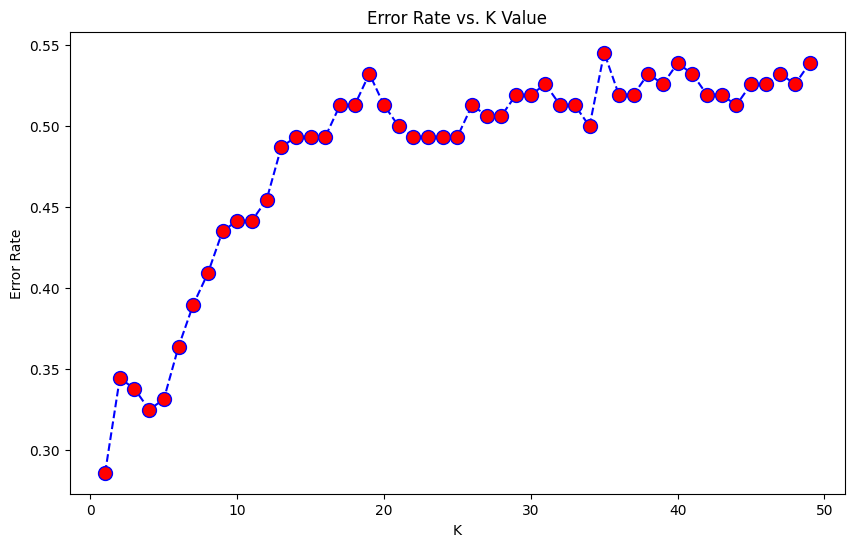

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [126]:
knn= KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train_scaled,y_train)
knn_preds = knn.predict(X_test_scaled)
f1_knn=f1_score(y_test, knn_preds, average='weighted')

print('With K=32')
print(f"F1 Score: {f1_score(y_test, knn_preds, average='weighted'):.4f}")
print('\n')

print(confusion_matrix(y_test,knn_preds))
print(classification_report(y_test,knn_preds))


With K=35
F1 Score: 0.4760


[[12  6  0  2  1  1]
 [ 8 17  0  1  2  0]
 [ 0  3 20  3  0  2]
 [ 0  3  6  9  5  3]
 [ 2  5  3  2  9  1]
 [ 1  4  6  4  5  8]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        22
           1       0.45      0.61      0.52        28
           2       0.57      0.71      0.63        28
           3       0.43      0.35      0.38        26
           4       0.41      0.41      0.41        22
           5       0.53      0.29      0.37        28

    accuracy                           0.49       154
   macro avg       0.49      0.48      0.47       154
weighted avg       0.49      0.49      0.48       154



In [127]:

acc_knn=accuracy_score(y_test, knn_preds)
acc_knn

0.487012987012987

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [79]:
rf_predict=rf.predict(X_test_scaled)
rf_predict

array([3, 3, 0, 1, 5, 4, 2, 3, 0, 1, 1, 1, 1, 4, 5, 3, 4, 1, 0, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 3, 5, 4, 3, 1, 4, 2, 3, 0, 2, 0, 2, 5, 4, 2, 0,
       2, 2, 2, 2, 4, 5, 0, 5, 3, 3, 5, 4, 5, 4, 4, 3, 3, 5, 0, 2, 5, 5,
       1, 4, 4, 3, 2, 4, 0, 2, 0, 3, 4, 3, 3, 2, 0, 5, 1, 3, 1, 5, 1, 0,
       2, 3, 0, 3, 4, 5, 4, 4, 4, 5, 4, 2, 0, 4, 1, 0, 3, 0, 2, 3, 0, 4,
       2, 4, 2, 1, 3, 4, 4, 1, 2, 2, 1, 4, 3, 3, 2, 1, 3, 4, 1, 0, 2, 1,
       3, 0, 1, 3, 4, 1, 0, 0, 2, 1, 5, 5, 1, 1, 1, 2, 0, 3, 1, 3, 1, 4])

In [80]:
print(confusion_matrix(y_test,rf_predict))

[[17  4  0  0  1  0]
 [ 2 22  0  1  2  1]
 [ 0  1 23  1  3  0]
 [ 0  1  0 23  1  1]
 [ 3  1  2  0 16  0]
 [ 2  2  1  3  5 15]]


In [81]:
print(f"F1 Score: {f1_score(y_test, rf_predict, average='weighted'):.4f}")
print(classification_report(y_test,rf_predict))

F1 Score: 0.7525
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.71      0.79      0.75        28
           2       0.88      0.82      0.85        28
           3       0.82      0.88      0.85        26
           4       0.57      0.73      0.64        22
           5       0.88      0.54      0.67        28

    accuracy                           0.75       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.77      0.75      0.75       154



In [82]:
# with hyperparametric tuning

In [83]:
rf = RandomForestClassifier(random_state=42)

'''param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],          
    'criterion': ['gini', 'entropy'],       
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'bootstrap': [True, False]              
}'''
param_grid = {
    'n_estimators': [100, 300, 500],         
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 20, 40],      
    'min_samples_split': [2, 10],        
    'min_samples_leaf': [1, 4],       
    'max_features': ['sqrt', 'log2'],    
    'bootstrap': [True]   
}


In [84]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 20, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [85]:
best_rf = grid_search.best_estimator_
rf_preds = best_rf.predict(X_test_scaled)
f1_rf = f1_score(y_test, rf_preds, average='weighted')
f1_rf

0.7461070864132088

In [86]:

acc_rf=accuracy_score(y_test, rf_preds)
acc_rf

0.7467532467532467

In [87]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"F1 Score: {f1_score(y_test, rf_preds, average='weighted'):.4f}")
print(f"Accuracy: {accuracy_score(y_test, rf_preds)}")
print("Classification Report:\n", classification_report(y_test, rf_preds))

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score: 0.7461
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71        22
           1       0.69      0.79      0.73        28
           2       0.88      0.82      0.85        28
           3       0.81      0.81      0.81        26
           4       0.63      0.77      0.69        22
           5       0.88      0.54      0.67        28

    accuracy                           0.75       154
   macro avg       0.76      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154



# XGBoost

In [88]:
#!pip install xgboost

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print(f"XGBoost - Accuracy: {acc_xgb:.4f}, F1 Score: {f1_xgb:.4f}")


C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7273, F1 Score: 0.7271


In [90]:
print("\nXGBoost WithOut Hyperparameter Tuning:")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost WithOut Hyperparameter Tuning:
F1 Score: 0.7271
Accuracy: 0.538961038961039
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.68      0.82      0.74        28
           2       0.88      0.75      0.81        28
           3       0.76      0.85      0.80        26
           4       0.56      0.68      0.61        22
           5       0.88      0.54      0.67        28

    accuracy                           0.73       154
   macro avg       0.74      0.73      0.72       154
weighted avg       0.75      0.73      0.73       154



In [91]:
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")
f1_xgb

0.7270784222726289

In [92]:
# with Hyperparametric tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Define parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.7, 1]  # Fraction of data used per tree
}

In [95]:

# Initialize classifier
xgb_tuned = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [96]:
# Perform GridSearchCV
grid_xgb = GridSearchCV(xgb_tuned, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

C:\Users\Shahina Mansoor\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1]},
             scoring='accuracy')

In [97]:
print("Best XGBoost Parameters:", grid_xgb.best_params_)

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


In [98]:
y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test_scaled)

In [99]:
# Evaluate
xgb_tuned_acc = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"XGBoost Accuracy (Tuned Parameters): {xgb_tuned_acc:.4f}")
f1_xg=f1_score(y_test, y_pred_xgb_tuned, average='weighted')

XGBoost Accuracy (Tuned Parameters): 0.7857


In [100]:

f1_xg

0.7822863768224252

In [101]:
# Evaluate Performance
print("\nXGBoost With Hyperparameter Tuning:")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb_tuned, average='weighted'):.4f}")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_tuned))


XGBoost With Hyperparameter Tuning:
F1 Score: 0.7823
Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.71      0.86      0.77        28
           2       0.89      0.89      0.89        28
           3       0.78      0.81      0.79        26
           4       0.69      0.82      0.75        22
           5       0.94      0.54      0.68        28

    accuracy                           0.79       154
   macro avg       0.80      0.79      0.78       154
weighted avg       0.80      0.79      0.78       154



In [104]:
model_performance = {
    "Logistic Regression": [accuracy_tuned],
    "SVM": [acc_svm],
    "k-NN": [acc_knn],
    "Random Forest": [acc_rf],
    "XGBoost": [xgb_tuned_acc]
}

import pandas as pd
results_df = pd.DataFrame(model_performance, index=["Accuracy"]).T
print(results_df.sort_values(by="Accuracy", ascending=False))


                     Accuracy
XGBoost              0.785714
Random Forest        0.746753
SVM                  0.577922
k-NN                 0.487013
Logistic Regression  0.383117
